In [1]:
# import requir modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv data
sale_data=pd.read_csv("Amazon Sales data - Amazon Sales data.csv")
sale_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Accessing column names
sale_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
# find row num and col num
print(f"Number of rows: {sale_data.shape[0]} and number of columns: {sale_data.shape[1]}")

Number of rows: 100 and number of columns: 14


In [5]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
# Check for missing value
sale_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
# Summary statistics
sale_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
# check profit margin
sale_data['Profit Margin'] = (sale_data['Total Profit'] / sale_data['Total Revenue']) * 100
profit_margin_head = sale_data['Profit Margin'].head(10)
print("profit margin :",profit_margin_head)

profit margin : 0    37.550924
1    43.067574
2    19.386987
3    25.830654
4    19.386987
5    37.550924
6    24.799856
7    40.977541
8    30.661936
9    43.067574
Name: Profit Margin, dtype: float64


In [9]:
# Convert Order Date and Ship Date
sale_data['Order Date'] = pd.to_datetime(sale_data['Order Date'])
sale_data['Ship Date'] = pd.to_datetime(sale_data['Ship Date'])


In [10]:
# Average unit price by region
avg_unit_price_by_region = sale_data.groupby('Region')['Unit Price'].mean()
print(avg_unit_price_by_region)


Region
Asia                                 335.809091
Australia and Oceania                222.672727
Central America and the Caribbean    243.172857
Europe                               328.979545
Middle East and North Africa         241.506000
North America                        277.243333
Sub-Saharan Africa                   259.618889
Name: Unit Price, dtype: float64


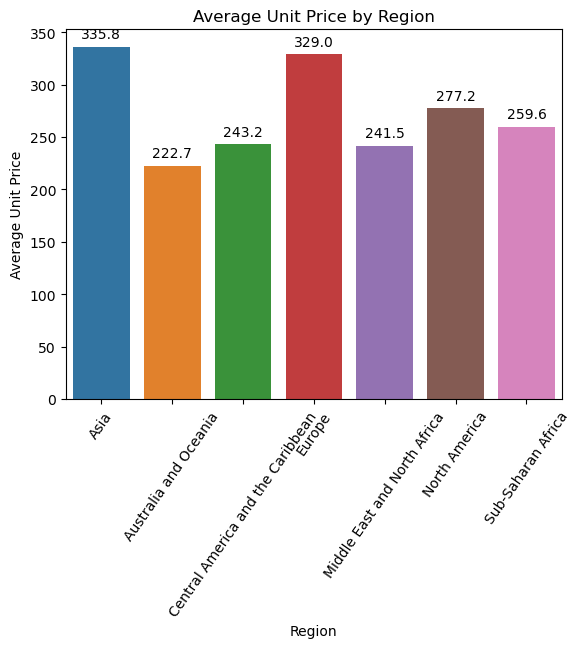

In [11]:
# Bar chart of average unit price by region

import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.barplot(x='Region', y='Unit Price', data=avg_unit_price_by_region.reset_index())

plt.xlabel('Region')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Region')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xticks(rotation=55)
plt.show()



In [12]:
avg_total_profit_by_region = sale_data.groupby('Region')['Total Profit'].mean()
avg_total_profit_by_region

Region
Asia                                 555804.170000
Australia and Oceania                429287.275455
Central America and the Caribbean    406701.121429
Europe                               503769.937727
Middle East and North Africa         576119.186000
North America                        485980.920000
Sub-Saharan Africa                   338422.538889
Name: Total Profit, dtype: float64

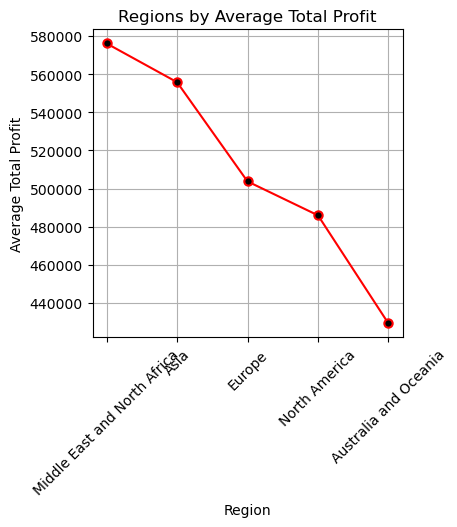

In [13]:
# Regions by Average Total Profit
regions = avg_total_profit_by_region.nlargest()
plt.figure(figsize=(4, 4))
regions.plot(kind='line', color='r', marker='o', markerfacecolor='black', markeredgewidth=1.5)
plt.xlabel('Region')
plt.ylabel('Average Total Profit')
plt.title('Regions by Average Total Profit')
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

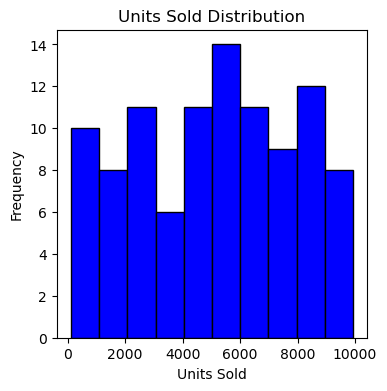

In [14]:
plt.figure(figsize=(4, 4))
# Create a histogram of Units Sold
plt.hist(sale_data['Units Sold'], color='b',edgecolor='black', bins=10)
# Labeling and title
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Units Sold Distribution')
# Show the plot
plt.show()

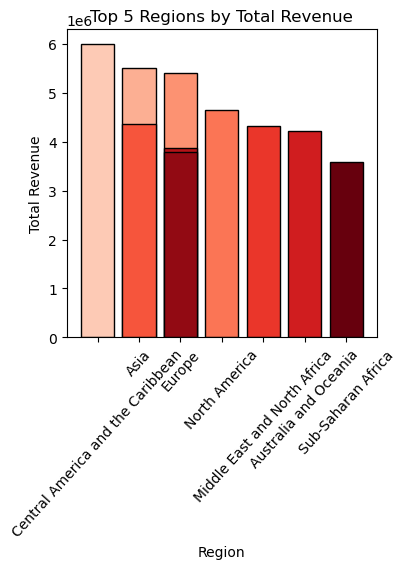

In [15]:
import numpy as np
sorted_sale_data = sale_data.sort_values(by='Total Revenue', ascending=False)
total_revenue = sorted_sale_data['Total Revenue'].head(10)
colors = plt.cm.Reds(np.linspace(0.2, 1, len(total_revenue)))
plt.figure(figsize=(4, 4))
plt.bar(sorted_sale_data['Region'].head(10), total_revenue, color=colors, edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Top 5 Regions by Total Revenue')
plt.xticks(rotation=48)
plt.show()


In [16]:
sale_data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987


In [17]:
# privote table
pivot_table = pd.pivot_table(sale_data, 
                             values=['Total Revenue', 'Total Cost', 'Total Profit'], 
                             index='Region', 
                             aggfunc='sum')
print(pivot_table)

                                    Total Cost  Total Profit  Total Revenue
Region                                                                     
Asia                               15233245.15    6113845.87    21347091.02
Australia and Oceania               9372105.10    4722160.03    14094265.13
Central America and the Caribbean   6323477.64    2846907.85     9170385.49
Europe                             22285993.48   11082938.63    33368932.11
Middle East and North Africa        8291514.72    5761191.86    14052706.58
North America                       4185413.79    1457942.76     5643356.55
Sub-Saharan Africa                 27488820.03   12183211.40    39672031.43


In [18]:
table = pd.pivot_table(sale_data, 
                             values=['Units Sold', 'Unit Price', 'Unit Cost'], 
                             index='Region', 
                             aggfunc='sum')
print(table)

                                   Unit Cost  Unit Price  Units Sold
Region                                                              
Asia                                 2635.46     3693.90       59967
Australia and Oceania                1702.19     2449.40       68325
Central America and the Caribbean    1104.72     1702.21       35771
Europe                               4909.66     7237.55       98117
Middle East and North Africa         1524.50     2415.06       48678
North America                         615.88      831.73       19143
Sub-Saharan Africa                   6612.39     9346.28      182870


In [19]:
table1 = pd.pivot_table(sale_data, 
                             values='Total Revenue', 
                             index='Item Type', 
                             columns='Sales Channel', 
                             aggfunc='count')

print(table1)

Sales Channel    Offline  Online
Item Type                       
Baby Food            3.0     4.0
Beverages            6.0     2.0
Cereal               3.0     4.0
Clothes              6.0     7.0
Cosmetics            7.0     6.0
Fruits               2.0     8.0
Household            8.0     1.0
Meat                 NaN     2.0
Office Supplies      6.0     6.0
Personal Care        7.0     3.0
Snacks               NaN     3.0
Vegetables           2.0     4.0


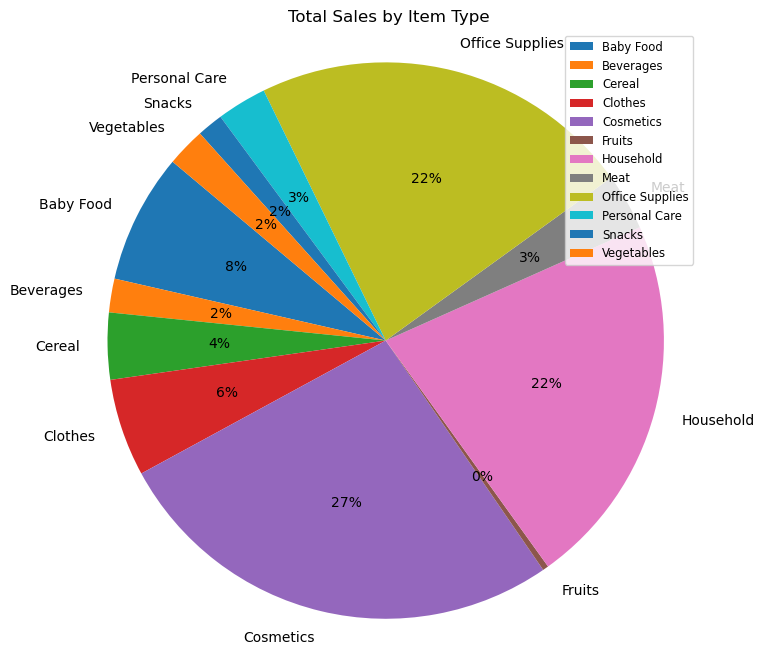

In [20]:
total_sales_by_item = sale_data.groupby('Item Type')['Total Revenue'].sum()
plt.figure(figsize=(8,8))
plt.pie(total_sales_by_item, labels=total_sales_by_item.index, autopct='%0.0f%%', startangle=140)
plt.title('Total Sales by Item Type')
plt.legend(loc='upper right',fontsize='small')
plt.axis('equal')  
plt.show()

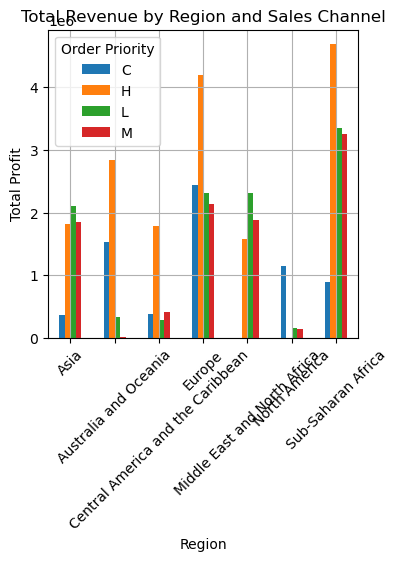

In [21]:
pivot_table = sale_data.pivot_table(values='Total Profit', index='Region', columns='Order Priority', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(4, 4))
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Revenue by Region and Sales Channel')
plt.xticks(rotation=45)
plt.legend(title='Order Priority')
plt.grid()  
plt.show()


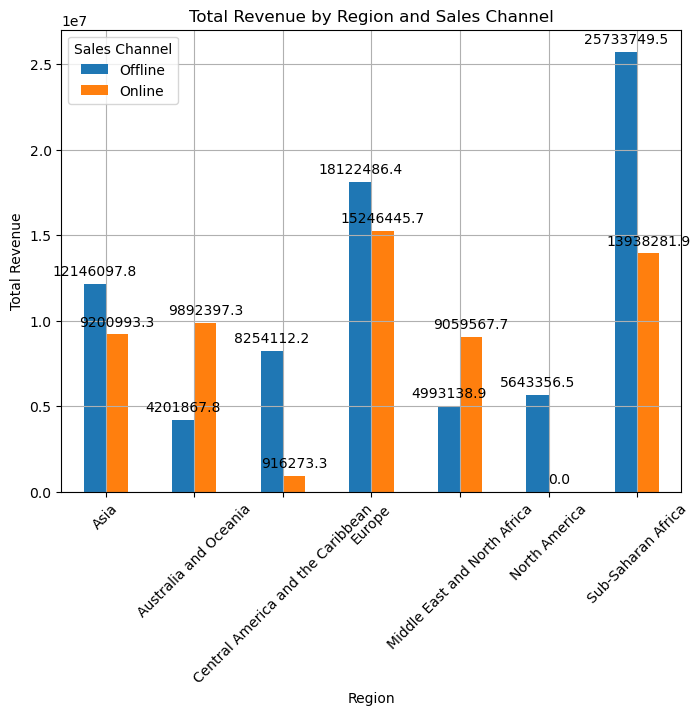

In [22]:

pivot_table = sale_data.pivot_table(values='Total Revenue', index='Region', columns='Sales Channel', aggfunc='sum')
ax = pivot_table.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region and Sales Channel')
plt.xticks(rotation=45)
plt.legend(title='Sales Channel')
plt.grid(True)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()



In [23]:
sale_data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987


In [24]:
df=sale_data

In [25]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987


In [26]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Year']=df['Ship Date'].dt.year
df[['Ship Date','Year']].head(10)

,Ship Date,Year
0,2010-06-27,2010
1,2012-09-15,2012
2,2014-05-08,2014
3,2014-07-05,2014
4,2013-02-06,2013
5,2015-02-21,2015
6,2011-04-27,2011
7,2012-07-27,2012
8,2015-08-25,2015
9,2014-05-30,2014


In [27]:
df['month']=df['Ship Date'].dt.strftime("%B")
df[['Ship Date','month']].head(10)

,Ship Date,month
0,2010-06-27,June
1,2012-09-15,September
2,2014-05-08,May
3,2014-07-05,July
4,2013-02-06,February
5,2015-02-21,February
6,2011-04-27,April
7,2012-07-27,July
8,2015-08-25,August
9,2014-05-30,May


In [28]:
Total_Profit_per_year=df.groupby(df['Year'])['Total Profit'].sum()
Total_Profit_per_year

Year
2010    5987980.15
2011    2946149.26
2012    9649456.37
2013    6662167.54
2014    5932714.18
2015    3996539.44
2016    4903838.01
2017    4089353.45
Name: Total Profit, dtype: float64

In [29]:
profit_df=Total_Profit_per_year.reset_index()
profit_df.columns=['Year','Total Profit']
profit_df

,Year,Total Profit
0,2010,5987980.15
1,2011,2946149.26
2,2012,9649456.37
3,2013,6662167.54
4,2014,5932714.18
5,2015,3996539.44
6,2016,4903838.01
7,2017,4089353.45


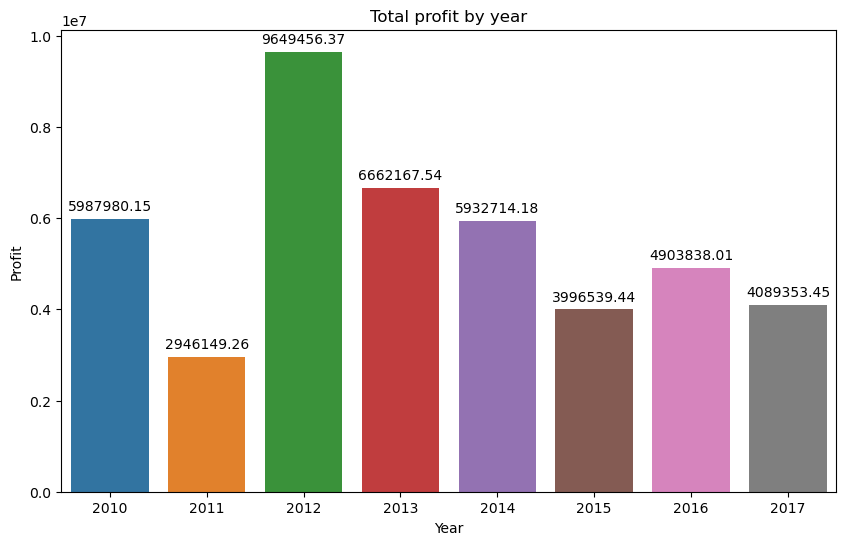

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Total Profit', data=profit_df)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title("Total profit by year")

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.2f'),
                (p.get_x()+p.get_width()/2,p.get_height()),
                ha='center',va='center',
                xytext=(0,9),
                  textcoords='offset points') #This specifies that the coordinates given in xytext
                

plt.show()
